# BI-LSTM(Bi-directional long short term memory)

Bidirectional long-short term memory(bi-lstm) is the process of making any neural network o have the sequence information in both directions backwards (future to past) or forward(past to future). 

In bidirectional, our input flows in two directions, making a bi-lstm different from the regular LSTM. With the regular LSTM, we can make input flow in one direction, either backwards or forward. However, in bi-directional, we can make the input flow in both directions to preserve the future and the past information. For a better explanation, let’s have an example.    

In the sentence “boys go to …..” we can not fill the blank space. Still, when we have a future sentence “boys come out of school”, we can easily predict the past blank space the similar thing we want to perform by our model and bidirectional LSTM allows the neural network to perform this.

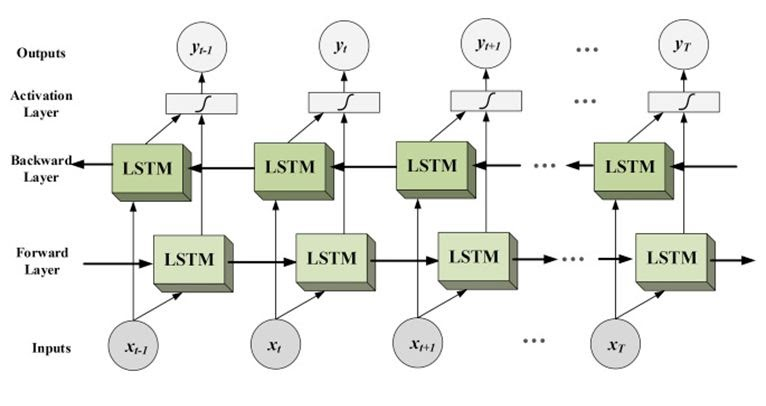

In the diagram, we can see the flow of information from backward and forward layers. BI-LSTM is usually employed where the sequence to sequence tasks are needed.  This kind of network can be used in text classification, speech recognition and forecasting models. Next in the article, we are going to make a bi-directional LSTM model using python.

https://analyticsindiamag.com/complete-guide-to-bidirectional-lstm-with-python-codes/

In [ ]:
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.datasets import imdb

In [ ]:
n_unique_words = 10000 # cut texts after this number of words
maxlen = 200
batch_size = 128

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=n_unique_words)


17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(x_train[0, :])

[   5   25  100   43  838  112   50  670    2    9   35  480  284    5
  150    4  172  112  167    2  336  385   39    4  172 4536 1111   17
  546   38   13  447    4  192   50   16    6  147 2025   19   14   22
    4 1920 4613  469    4   22   71   87   12   16   43  530   38   76
   15   13 1247    4   22   17  515   17   12   16  626   18    2    5
   62  386   12    8  316    8  106    5    4 2223 5244   16  480   66
 3785   33    4  130   12   16   38  619    5   25  124   51   36  135
   48   25 1415   33    6   22   12  215   28   77   52    5   14  407
   16   82    2    8    4  107  117 5952   15  256    4    2    7 3766
    5  723   36   71   43  530  476   26  400  317   46    7    4    2
 1029   13  104   88    4  381   15  297   98   32 2071   56   26  141
    6  194 7486   18    4  226   22   21  134  476   26  480    5  144
   30 5535   18   51   36   28  224   92   25  104    4  226   65   16
   38 1334   88   12   16  283    5   16 4472  113  103   32   15   16
 5345 

In [ ]:
model = Sequential()
model.add(Embedding(n_unique_words, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:


print('Train...')
history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=4,
          validation_data=[x_test, y_test])

Train...
Epoch 1/4
196/196 [==============================] - 131s 656ms/step - loss: 0.4355 - accuracy: 0.7920 - val_loss: 0.3180 - val_accuracy: 0.8672
Epoch 2/4
196/196 [==============================] - 120s 611ms/step - loss: 0.2412 - accuracy: 0.9072 - val_loss: 0.3469 - val_accuracy: 0.8659
Epoch 3/4
196/196 [==============================] - 118s 603ms/step - loss: 0.1769 - accuracy: 0.9349 - val_loss: 0.3715 - val_accuracy: 0.8607
Epoch 4/4
196/196 [==============================] - 117s 599ms/step - loss: 0.1401 - accuracy: 0.9496 - val_loss: 0.4647 - val_accuracy: 0.8553


In [ ]:
y_pred=model.predict(x_test)



In [ ]:
history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=12,
          validation_data=[x_test, y_test])

print(history.history['loss'])
print(history.history['accuracy'])

Epoch 1/12
196/196 [==============================] - 117s 600ms/step - loss: 0.1191 - accuracy: 0.9602 - val_loss: 0.4202 - val_accuracy: 0.8474
Epoch 2/12
196/196 [==============================] - 117s 599ms/step - loss: 0.0923 - accuracy: 0.9684 - val_loss: 0.5214 - val_accuracy: 0.8574
Epoch 3/12
196/196 [==============================] - 117s 599ms/step - loss: 0.0775 - accuracy: 0.9742 - val_loss: 0.4510 - val_accuracy: 0.8539
Epoch 4/12
196/196 [==============================] - 118s 600ms/step - loss: 0.0649 - accuracy: 0.9801 - val_loss: 0.5330 - val_accuracy: 0.8540
Epoch 5/12
196/196 [==============================] - 118s 602ms/step - loss: 0.0651 - accuracy: 0.9788 - val_loss: 0.5528 - val_accuracy: 0.8471
Epoch 6/12
196/196 [==============================] - 117s 600ms/step - loss: 0.0627 - accuracy: 0.9803 - val_loss: 0.6612 - val_accuracy: 0.8520
Epoch 7/12
196/196 [==============================] - 118s 601ms/step - loss: 0.0529 - accuracy: 0.9833 - val_loss: 0.5213 -

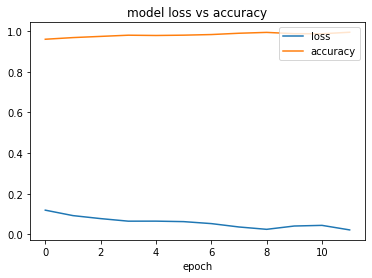

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('model loss vs accuracy')

pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show()